In [1]:
import tensorflow as tf

In [2]:
import tensorflow.keras as k

In [6]:
from tensorflow.keras.datasets import reuters

In [7]:
(x_train,y_train),(x_test,y_test)=reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 11s 5us/step


In [12]:
word_index=reuters.get_word_index()

557056/550378 [==============================] - 0s 1us/step


In [19]:
reverse_word_index=dict([(value,key) for (key,value) in word_index.items()])

In [39]:
decoded=" ".join([reverse_word_index[i] for i in x_train[0]])

In [41]:
decoded

'the of of mln loss for plc said at only ended said commonwealth could 1 traders now april 0 a after said from 1985 and from foreign 000 april 0 prices its account year a but in this mln home an states earlier and rise and revs vs 000 its 16 vs 000 a but 3 psbr oils several and shareholders and dividend vs 000 its all 4 vs 000 1 mln agreed largely april 0 are 2 states will billion total and against 000 pct dlrs'

In [52]:
np.unique(np.array(y_train))# multilabel classification

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

In [68]:
def one_hot(sequences,dimension=10000):
    results=np.zeros((len(sequences),dimension))
    for i,sequence in enumerate (sequences):
        results[i,sequence]=1
    return results

In [62]:
x_train=one_hot(x_train)
x_test=one_hot(x_test)

In [67]:
def one_hot_labels(sequences,dimension=46):
    results=np.zeros((len(sequences),dimension))
    for i,sequence in enumerate (sequences):
        results[i,sequence]=1
    return results

In [69]:
y_train=one_hot_labels(y_train)

# or use keras.utils import to_categorical

In [72]:
from tensorflow.keras import models,layers

In [73]:
model=models.Sequential()

In [74]:
model.add(layers.Dense(64,activation="relu",input_shape=(10000,)))
model.add(layers.Dense(32,activation="elu"))
model.add(layers.Dense(46,activation="softmax"))

In [75]:
model.compile(optimizer="rmsprop",loss="categorical_crossentropy",metrics=["acc"])

In [82]:
x_val=x_train[:1000]
y_val=y_train[:1000]
x_train=x_train[1000:]
y_train=y_train[1000:]

In [83]:
history=model.fit(x_train,y_train,batch_size=128,epochs=20,validation_data=(x_val,y_val))

Train on 6982 samples, validate on 1000 samples
Epoch 1/20
6982/6982 [==============================] - 9s 1ms/sample - loss: 1.9502 - acc: 0.6033 - val_loss: 1.3925 - val_acc: 0.6910
Epoch 2/20
6982/6982 [==============================] - 1s 209us/sample - loss: 1.0092 - acc: 0.7770 - val_loss: 1.1561 - val_acc: 0.7500
Epoch 3/20
6982/6982 [==============================] - 1s 184us/sample - loss: 0.6801 - acc: 0.8558 - val_loss: 1.0556 - val_acc: 0.7640
Epoch 4/20
6982/6982 [==============================] - 1s 182us/sample - loss: 0.4729 - acc: 0.9016 - val_loss: 1.0123 - val_acc: 0.7890
Epoch 5/20
6982/6982 [==============================] - 1s 181us/sample - loss: 0.3410 - acc: 0.9324 - val_loss: 1.0198 - val_acc: 0.7870
Epoch 6/20
6982/6982 [==============================] - 1s 184us/sample - loss: 0.2597 - acc: 0.9459 - val_loss: 1.0563 - val_acc: 0.7930
Epoch 7/20
6982/6982 [==============================] - 1s 193us/sample - loss: 0.2093 - acc: 0.9522 - val_loss: 1.0831 - val_

In [85]:
data=history.history

In [87]:
import matplotlib.pyplot as plt

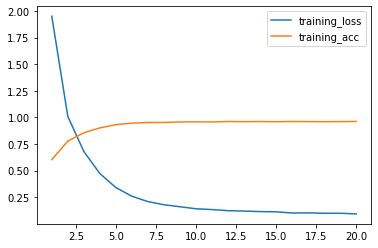

In [88]:
plt.plot(range(1,21),data["loss"],label="training_loss")
plt.plot(range(1,21),data["acc"],label="training_acc")
plt.legend()

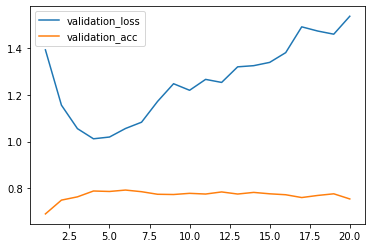

In [89]:
plt.plot(range(1,21),data["val_loss"],label="validation_loss")
plt.plot(range(1,21),data["val_acc"],label="validation_acc")
plt.legend()

# conclusion overfitting after 5 epoch